# **Box Plots**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-05 09:55:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  41.2MB/s    in 5.5s    

2025-05-05 09:55:53 (36.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


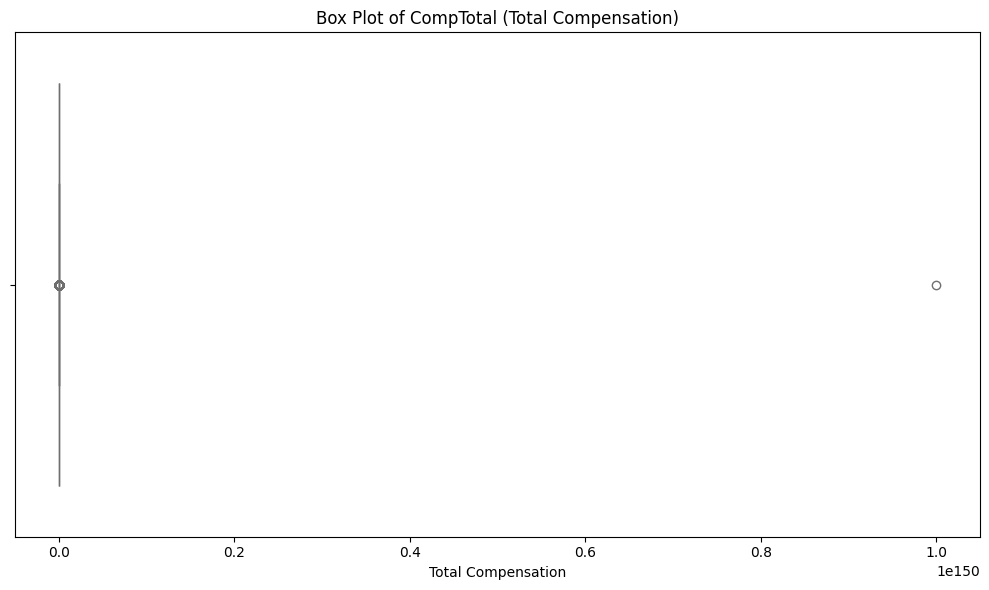

In [ ]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
comp_data = df['CompTotal'].dropna()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=comp_data, color='skyblue')

plt.title('Box Plot of CompTotal (Total Compensation)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


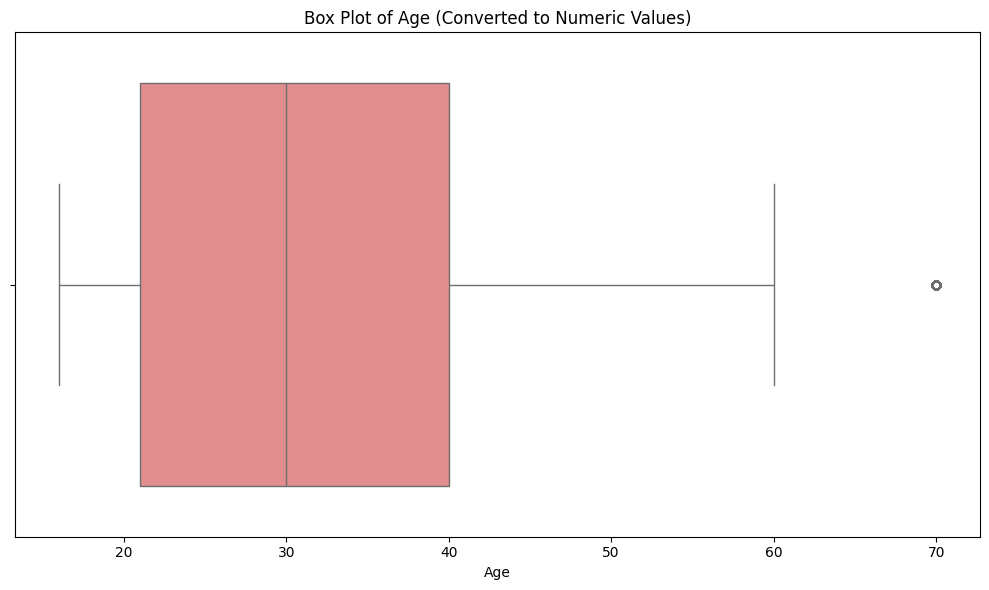

In [ ]:
# your code goes here
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

age_data = df['AgeNumeric'].dropna()
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_data, color='lightcoral')

plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<ipython-input-8-958bb2679379>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='CompTotal', data=df_box, palette='pastel')


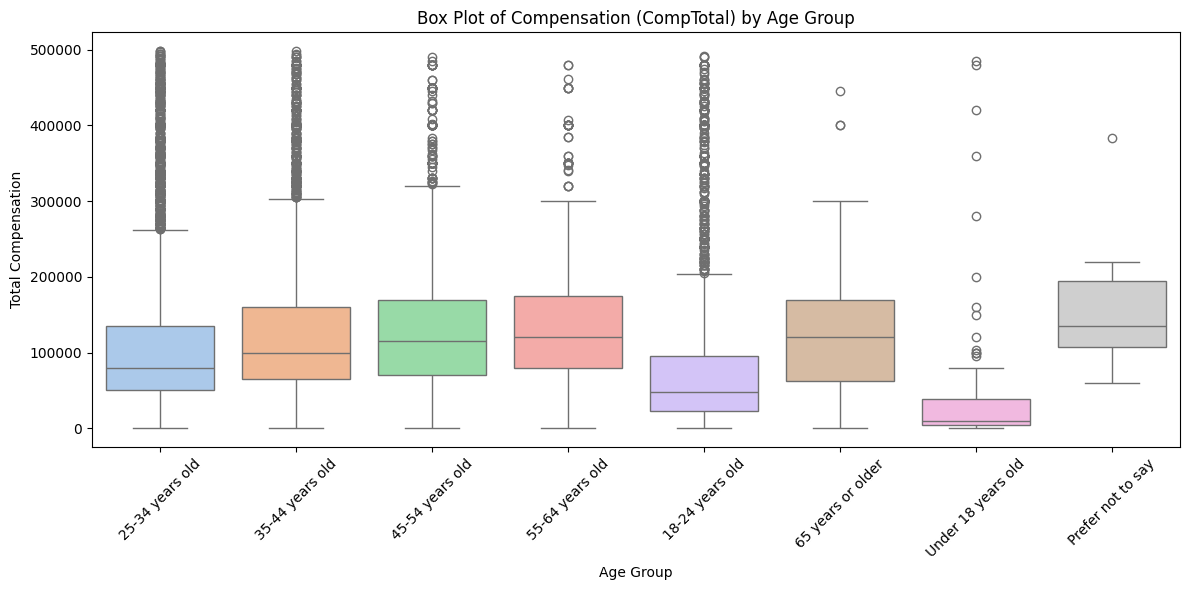

In [ ]:
# your code goes here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

df_box = df[['Age', 'CompTotal']].dropna()

df_box = df_box[df_box['CompTotal'] < 500000]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df_box, palette='pastel')

plt.title('Box Plot of Compensation (CompTotal) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<ipython-input-9-769e0812a2b3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_box, palette='coolwarm')


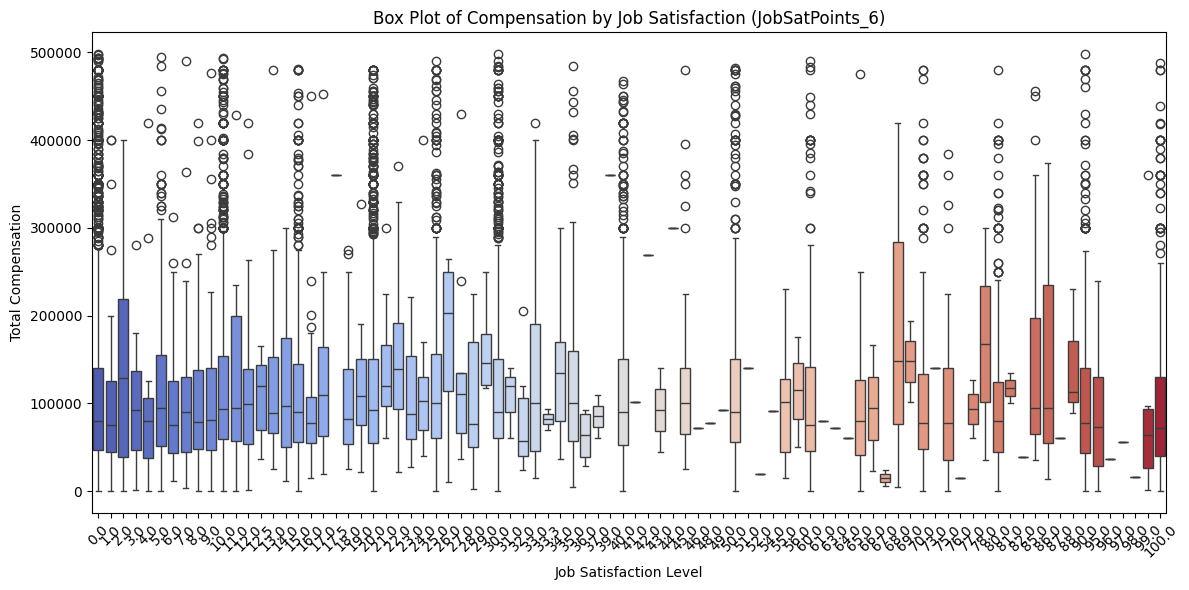

In [ ]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

df_box = df[['JobSatPoints_6', 'CompTotal']].dropna()

df_box = df_box[df_box['CompTotal'] < 500000]

plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_box, palette='coolwarm')

plt.title('Box Plot of Compensation by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [ ]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly,DevType
FROM main
WHERE ConvertedCompYearly  IS NOT NULL and DevType  IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)


<ipython-input-12-0398206ebcfd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expanded, x='DevType', y='ConvertedCompYearly', palette='viridis')


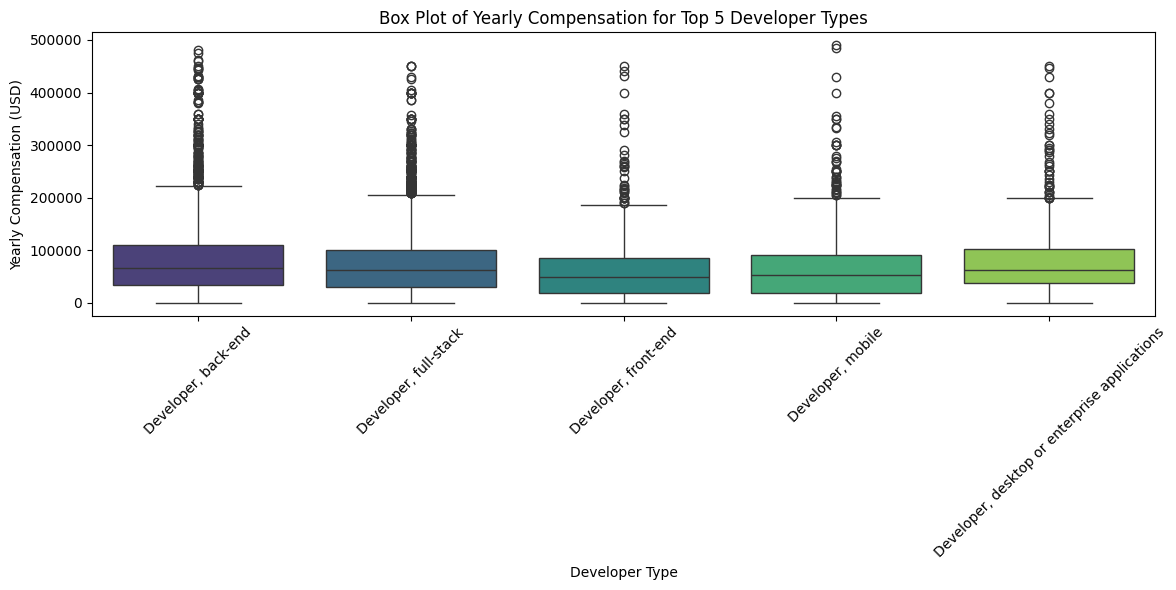

In [ ]:
df_dev = df[['DevType', 'ConvertedCompYearly']].dropna()

from collections import Counter
from itertools import chain

dev_roles = df_dev['DevType'].dropna().str.split(';')
top_roles = Counter(chain.from_iterable(dev_roles)).most_common(5)
top_5_roles = [role for role, count in top_roles]


df_expanded = df_dev.assign(DevType=df_dev['DevType'].str.split(';')).explode('DevType')
df_expanded = df_expanded[df_expanded['DevType'].isin(top_5_roles)]


df_expanded = df_expanded[df_expanded['ConvertedCompYearly'] < 500000]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_expanded, x='DevType', y='ConvertedCompYearly', palette='viridis')
plt.title('Box Plot of Yearly Compensation for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# your code goes here
QUERY = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal  IS NOT NULL and  Country  IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

<ipython-input-14-96fc5aa8eb90>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='Country', y='CompTotal', palette='Set2')


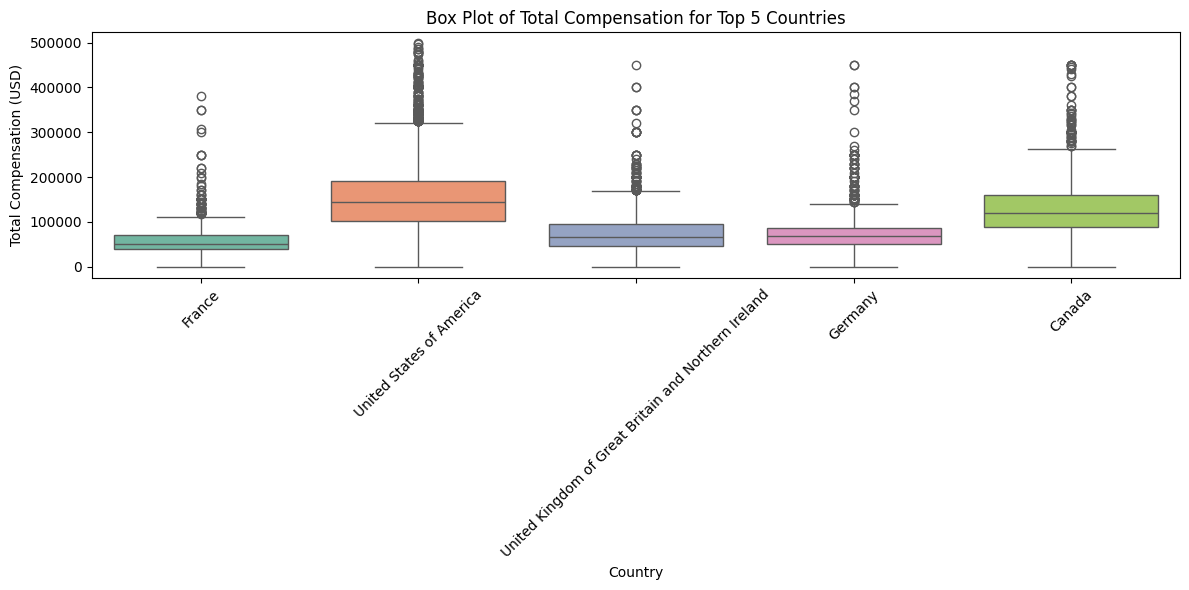

In [ ]:
df_country = df[['Country', 'CompTotal']].dropna()

df_country = df_country[df_country['CompTotal'] < 500000]

top_countries = df_country['Country'].value_counts().nlargest(5).index.tolist()

df_top5 = df_country[df_country['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='Country', y='CompTotal', palette='Set2')
plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here
QUERY = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal  IS NOT NULL and  Employment  IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

<ipython-input-17-f0dfbc0981d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_emp, x='Employment', y='CompTotal', palette='pastel')
<ipython-input-17-f0dfbc0981d7>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


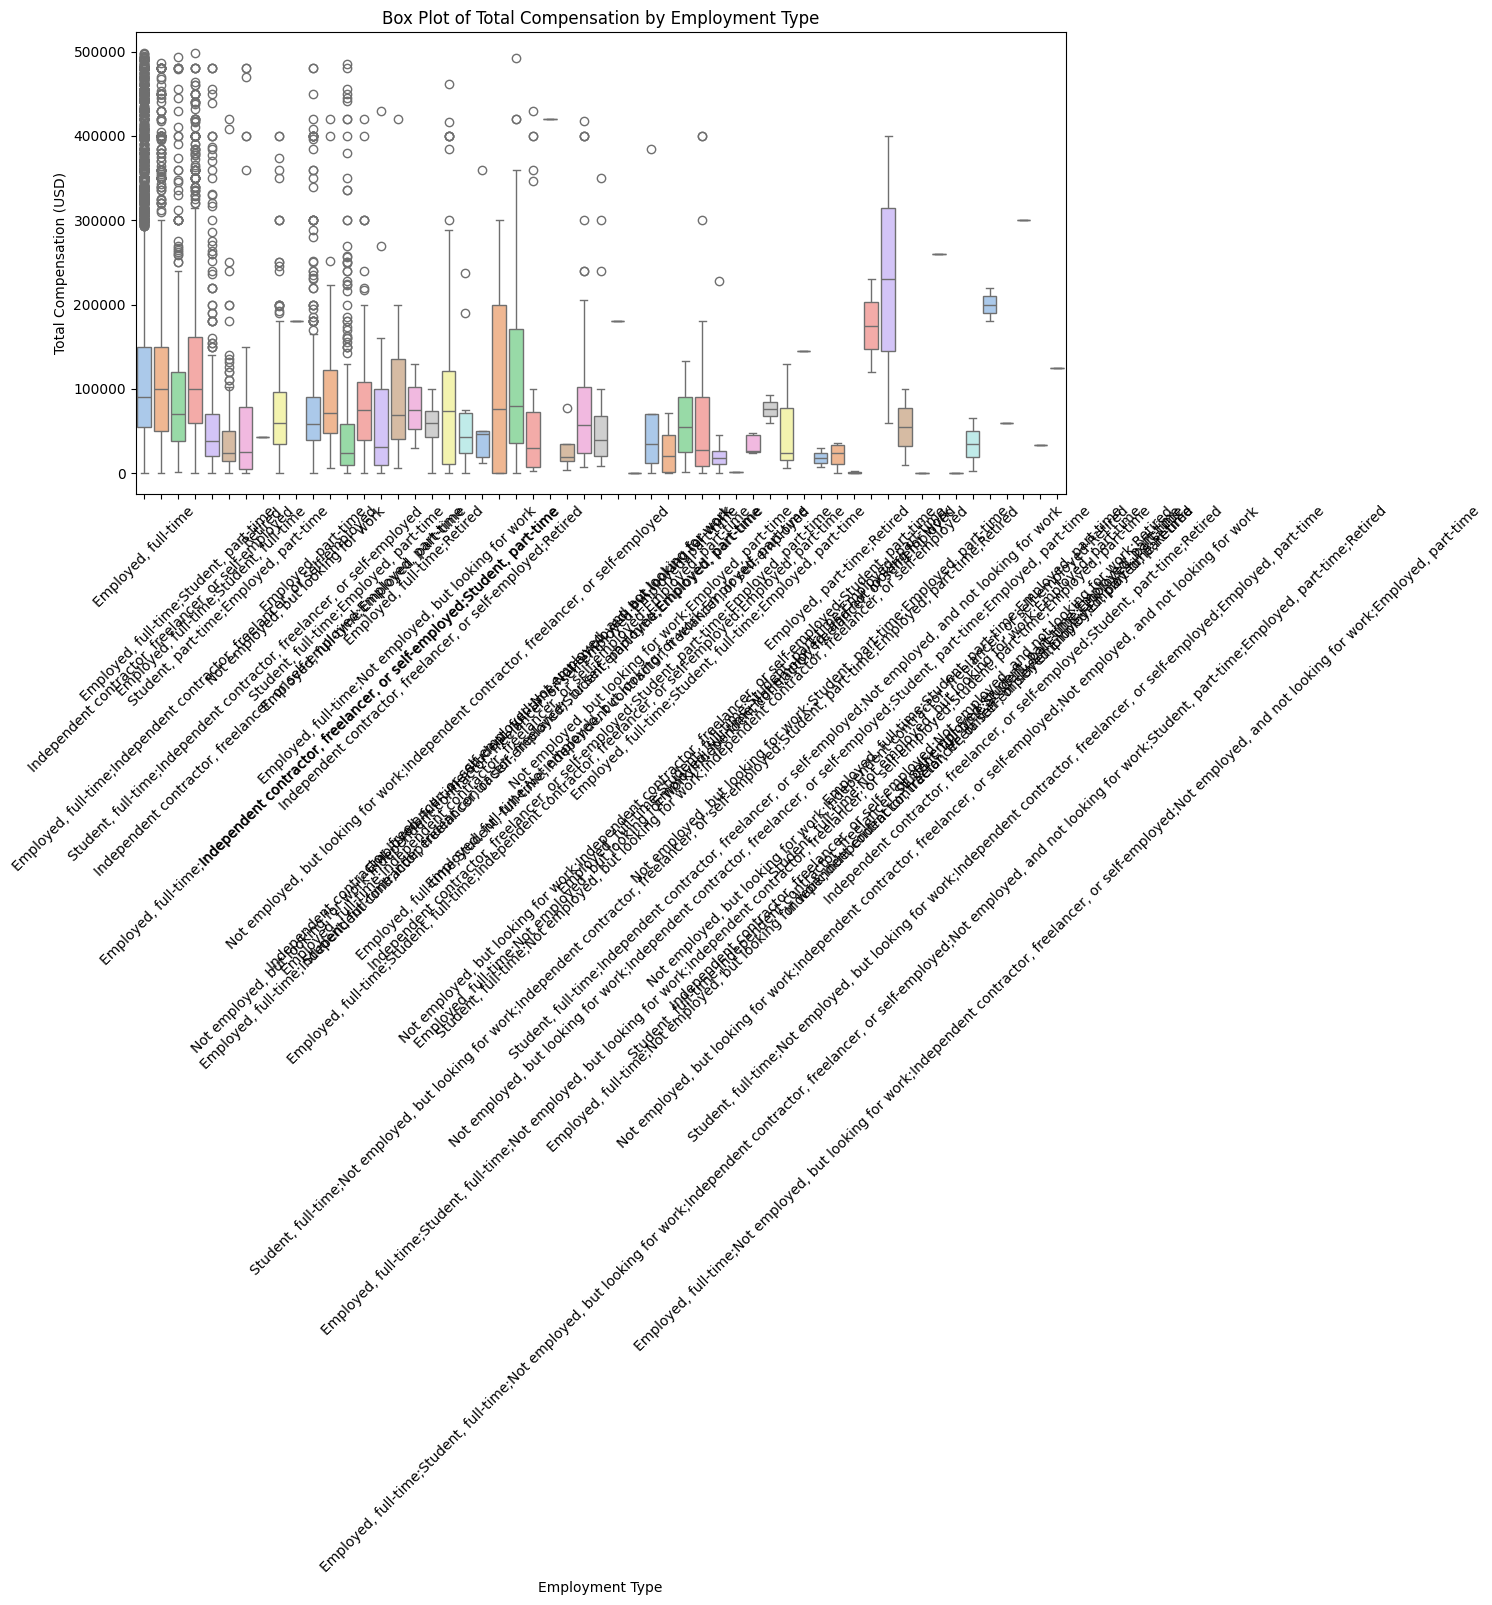

In [ ]:
df_emp = df[['Employment', 'CompTotal']].dropna()

df_emp = df_emp[df_emp['CompTotal'] < 500000]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_emp, x='Employment', y='CompTotal', palette='pastel')
plt.title('Box Plot of Total Compensation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro  IS NOT NULL and  JobSatPoints_6  IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

<ipython-input-19-7e8ad80b4d79>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='JobSatPoints_6', y='YearsCodePro', palette='Set3')


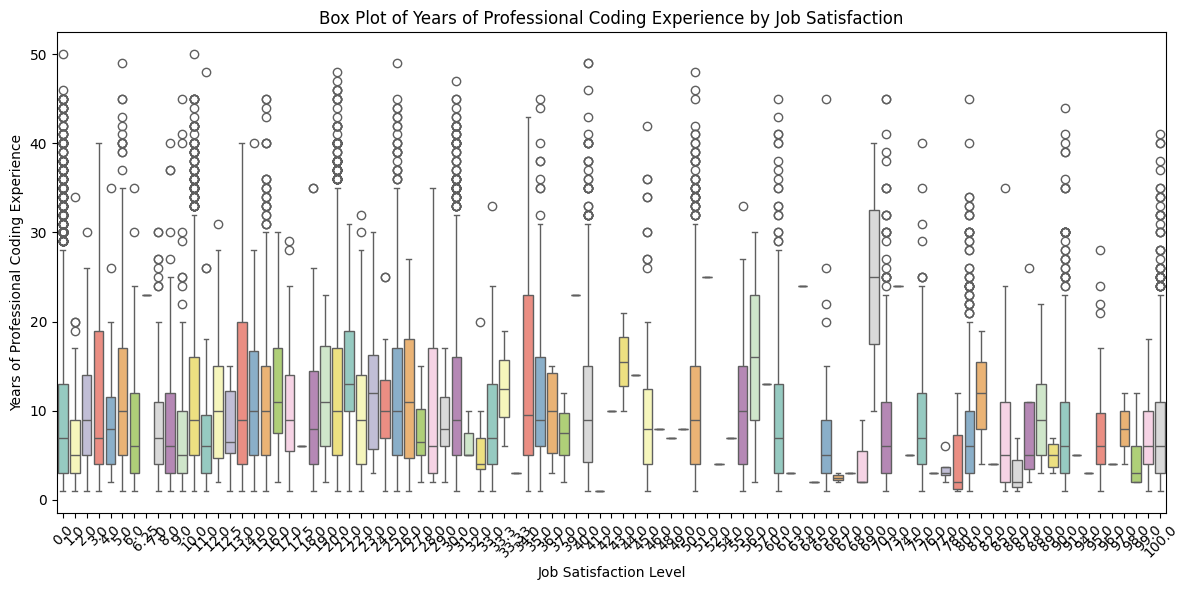

In [ ]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df_box = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='JobSatPoints_6', y='YearsCodePro', palette='Set3')
plt.title('Box Plot of Years of Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()